In [12]:
import os
os.chdir("/mnt/c/Users/16303/misc/antonio_molecules/chemetrian/notebooks/chemetrian-data-augmentation-notebooks/mmli/distribution_validator/distribution_v2")
import regression
train_path = "/mnt/c/Users/16303/misc/antonio_molecules/chemetrian/notebooks/chemetrian-data-augmentation-notebooks/mmli/MMLI_train.csv"
test_path = "/mnt/c/Users/16303/misc/antonio_molecules/chemetrian/notebooks/chemetrian-data-augmentation-notebooks/mmli/MMLI_infer.csv"
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

In [13]:
#mmli
df_train = pd.read_csv(train_path)
df_train = df_train.drop(columns=["Batch_ID", "Smiles"])
df_infer = pd.read_csv(test_path)
target = "T80"
print(df_train.columns)

Index(['T80', 'Mass', 'HAcceptors', 'HDonors', 'LogP', 'Asphericity', 'Rg',
       'TPSA', 'RingCount', 'NumRotatableBonds',
       ...
       'SDOS4.5', 'SDOS4.6', 'SDOS4.7', 'SDOS4.8', 'SDOS4.9', 'SDOS5.0',
       'SDOS5.1', 'SDOS5.2', 'SDOS5.3', 'SDOS5.4'],
      dtype='object', length=144)


In [14]:
#train
reg_train = regression.RegressionBuilder(
        df_train,
        None,
        target,
        hyperparameters_tune=True,
        feature_selection_autoselect=True,
        model_choice=["randomforest"],#ast.literal_eval(job_params["models"]),
        goal_metric="mse",
        data_augmentation=True,#job_params["data_augmentation"].lower() == "true",
        feature_selection_num=0,
        saved_model=None,
        saved_scaler=None,
        data_augmentation_method="vae",
        data_augmentation_sectioning="kde",
        data_augmentation_region_num=10,#10,#5,
        data_augmentation_min_samples_per_region=15,#15,#15,
        balance_strategy="increase",
        k=5,
        sampling_method="kfold"
    ).run_regression()

Fold 1 / 5
X.shape data augment vae - (27, 143)
Using device: cuda
Training VAE with 16 latent dimensions
Epoch 10/200, Loss: 145.097376
Epoch 20/200, Loss: 143.652027
Epoch 30/200, Loss: 142.838840
Epoch 40/200, Loss: 137.395589
Epoch 50/200, Loss: 133.385842
Epoch 60/200, Loss: 115.261891
Epoch 70/200, Loss: 109.717810
Epoch 80/200, Loss: 103.516014
Epoch 90/200, Loss: 95.147126
Epoch 100/200, Loss: 90.514504
Epoch 110/200, Loss: 84.016412
Epoch 120/200, Loss: 79.624792
Epoch 130/200, Loss: 73.646552
Epoch 140/200, Loss: 71.362205
Epoch 150/200, Loss: 69.232318
Epoch 160/200, Loss: 67.656123
Epoch 170/200, Loss: 65.751840
Epoch 180/200, Loss: 61.657471
Epoch 190/200, Loss: 61.314363
Epoch 200/200, Loss: 62.326005
Using 5 nearest neighbors for 27 samples
Finding neighbors in VAE latent space
Using pre-existing region information from stratified split
Region distribution before augmentation:
  Region 1 (1.50 to 2.18): 3 samples → Target: 15
  Region 2 (2.18 to 3.40): 3 samples → Target

2025-09-09 02:34:57,926 - INFO - Best parameters: {'bootstrap': False, 'max_depth': 18, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 198, 'oob_score': False}


Fold 2 / 5
X.shape data augment vae - (27, 143)
Using device: cuda
Training VAE with 16 latent dimensions
Epoch 10/200, Loss: 144.960223
Epoch 20/200, Loss: 144.342719
Epoch 30/200, Loss: 143.240840
Epoch 40/200, Loss: 139.740044
Epoch 50/200, Loss: 128.573477
Epoch 60/200, Loss: 119.780436
Epoch 70/200, Loss: 109.684444
Epoch 80/200, Loss: 101.322591
Epoch 90/200, Loss: 96.024875
Epoch 100/200, Loss: 95.507270
Epoch 110/200, Loss: 87.897859
Epoch 120/200, Loss: 84.990741
Epoch 130/200, Loss: 80.557183
Epoch 140/200, Loss: 77.015544
Epoch 150/200, Loss: 72.975455
Epoch 160/200, Loss: 72.700656
Epoch 170/200, Loss: 71.433169
Epoch 180/200, Loss: 70.077632
Epoch 190/200, Loss: 65.934521
Epoch 200/200, Loss: 66.345265
Using 5 nearest neighbors for 27 samples
Finding neighbors in VAE latent space
Using pre-existing region information from stratified split
Region distribution before augmentation:
  Region 1 (1.50 to 2.77): 3 samples → Target: 15
  Region 2 (2.77 to 5.33): 3 samples → Target

2025-09-09 02:36:08,996 - INFO - Best parameters: {'bootstrap': False, 'max_depth': 3, 'max_features': 'log2', 'min_samples_leaf': 4, 'min_samples_split': 6, 'n_estimators': 39, 'oob_score': False}


Fold 3 / 5
X.shape data augment vae - (27, 143)
Using device: cuda
Training VAE with 16 latent dimensions
Epoch 10/200, Loss: 144.850911
Epoch 20/200, Loss: 144.210458
Epoch 30/200, Loss: 143.687382
Epoch 40/200, Loss: 141.653447
Epoch 50/200, Loss: 133.500669
Epoch 60/200, Loss: 121.353968
Epoch 70/200, Loss: 109.970658
Epoch 80/200, Loss: 100.031612
Epoch 90/200, Loss: 92.809932
Epoch 100/200, Loss: 85.323893
Epoch 110/200, Loss: 80.801993
Epoch 120/200, Loss: 76.298611
Epoch 130/200, Loss: 73.488322
Epoch 140/200, Loss: 73.026955
Epoch 150/200, Loss: 68.252853
Epoch 160/200, Loss: 68.065796
Epoch 170/200, Loss: 67.206923
Epoch 180/200, Loss: 64.549108
Epoch 190/200, Loss: 62.852182
Epoch 200/200, Loss: 65.137646
Using 5 nearest neighbors for 27 samples
Finding neighbors in VAE latent space
Using pre-existing region information from stratified split
Region distribution before augmentation:
  Region 1 (1.50 to 2.40): 3 samples → Target: 15
  Region 2 (2.40 to 5.07): 3 samples → Target

2025-09-09 02:37:16,760 - INFO - Best parameters: {'bootstrap': True, 'max_depth': 15, 'max_features': 'log2', 'min_samples_leaf': 2, 'min_samples_split': 7, 'n_estimators': 44, 'oob_score': False}


Fold 4 / 5
X.shape data augment vae - (27, 143)
Using device: cuda
Training VAE with 16 latent dimensions
Epoch 10/200, Loss: 144.934986
Epoch 20/200, Loss: 144.434778
Epoch 30/200, Loss: 142.146240
Epoch 40/200, Loss: 133.785979
Epoch 50/200, Loss: 125.585205
Epoch 60/200, Loss: 111.214138
Epoch 70/200, Loss: 105.233398
Epoch 80/200, Loss: 94.506013
Epoch 90/200, Loss: 88.006465
Epoch 100/200, Loss: 82.124684
Epoch 110/200, Loss: 74.311754
Epoch 120/200, Loss: 71.442220
Epoch 130/200, Loss: 66.035138
Epoch 140/200, Loss: 66.159202
Epoch 150/200, Loss: 64.335540
Epoch 160/200, Loss: 62.979519
Epoch 170/200, Loss: 62.048136
Epoch 180/200, Loss: 63.188861
Epoch 190/200, Loss: 59.925031
Epoch 200/200, Loss: 59.836462
Using 5 nearest neighbors for 27 samples
Finding neighbors in VAE latent space
Using pre-existing region information from stratified split
Region distribution before augmentation:
  Region 1 (1.50 to 2.56): 3 samples → Target: 15
  Region 2 (2.56 to 5.61): 3 samples → Target:

2025-09-09 02:38:28,463 - INFO - Best parameters: {'bootstrap': False, 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 122, 'oob_score': False}


Fold 5 / 5
X.shape data augment vae - (28, 143)
Using device: cuda
Training VAE with 16 latent dimensions
Epoch 10/200, Loss: 144.287467
Epoch 20/200, Loss: 143.346401
Epoch 30/200, Loss: 142.727138
Epoch 40/200, Loss: 139.704921
Epoch 50/200, Loss: 131.838475
Epoch 60/200, Loss: 115.296509
Epoch 70/200, Loss: 98.752450
Epoch 80/200, Loss: 91.224845
Epoch 90/200, Loss: 86.224374
Epoch 100/200, Loss: 84.126578
Epoch 110/200, Loss: 82.734506
Epoch 120/200, Loss: 81.937483
Epoch 130/200, Loss: 82.886780
Epoch 140/200, Loss: 76.229876
Epoch 150/200, Loss: 73.641820
Epoch 160/200, Loss: 68.486053
Epoch 170/200, Loss: 69.962128
Epoch 180/200, Loss: 66.870135
Epoch 190/200, Loss: 65.052338
Epoch 200/200, Loss: 61.301052
Using 5 nearest neighbors for 28 samples
Finding neighbors in VAE latent space
Using pre-existing region information from stratified split
Region distribution before augmentation:
  Region 1 (1.50 to 2.22): 3 samples → Target: 15
  Region 2 (2.22 to 3.72): 3 samples → Target: 

2025-09-09 02:39:38,480 - INFO - Best parameters: {'bootstrap': False, 'max_depth': 14, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 9, 'n_estimators': 122, 'oob_score': False}


In [15]:
reg_train

{'metrics': {'train_mae': np.float64(11.103298493111133),
  'train_mse': np.float64(238.08624800216063),
  'train_adj_r2': 0,
  'train_r2': 0.6079562003802498,
  'test_mae': np.float64(15.802552194154302),
  'test_mse': np.float64(355.4146401226387),
  'test_adj_r2': 0,
  'test_r2': 0.6823614176690946},
 'model_name': 'randomforest',
 'model': RandomForestRegressor(bootstrap=False, max_depth=3, max_features='log2',
                       min_samples_leaf=4, min_samples_split=6, n_estimators=39),
 'hyperparameters': [{'Hyperparameter Name': 'bootstrap',
   'Hyperparameter Value': False},
  {'Hyperparameter Name': 'ccp_alpha', 'Hyperparameter Value': 0.0},
  {'Hyperparameter Name': 'criterion',
   'Hyperparameter Value': 'squared_error'},
  {'Hyperparameter Name': 'max_depth', 'Hyperparameter Value': 3},
  {'Hyperparameter Name': 'max_features', 'Hyperparameter Value': 'log2'},
  {'Hyperparameter Name': 'max_leaf_nodes', 'Hyperparameter Value': None},
  {'Hyperparameter Name': 'max_sampl

In [16]:
reg_train

{'metrics': {'train_mae': np.float64(11.103298493111133),
  'train_mse': np.float64(238.08624800216063),
  'train_adj_r2': 0,
  'train_r2': 0.6079562003802498,
  'test_mae': np.float64(15.802552194154302),
  'test_mse': np.float64(355.4146401226387),
  'test_adj_r2': 0,
  'test_r2': 0.6823614176690946},
 'model_name': 'randomforest',
 'model': RandomForestRegressor(bootstrap=False, max_depth=3, max_features='log2',
                       min_samples_leaf=4, min_samples_split=6, n_estimators=39),
 'hyperparameters': [{'Hyperparameter Name': 'bootstrap',
   'Hyperparameter Value': False},
  {'Hyperparameter Name': 'ccp_alpha', 'Hyperparameter Value': 0.0},
  {'Hyperparameter Name': 'criterion',
   'Hyperparameter Value': 'squared_error'},
  {'Hyperparameter Name': 'max_depth', 'Hyperparameter Value': 3},
  {'Hyperparameter Name': 'max_features', 'Hyperparameter Value': 'log2'},
  {'Hyperparameter Name': 'max_leaf_nodes', 'Hyperparameter Value': None},
  {'Hyperparameter Name': 'max_sampl

In [17]:
target_provided = True
df_infer = df_infer[reg_train["features"] + [target]] if target_provided else df_infer[reg_train["features"]] 

In [18]:
#infer
reg_infer = regression.RegressionBuilder(
        None,
        df_infer,
        target,
        hyperparameters_tune=True,
        feature_selection_autoselect=True,
        model_choice=["randomforest"],#ast.literal_eval(job_params["models"]),
        goal_metric="r2",
        data_augmentation=False,#True,#job_params["data_augmentation"].lower() == "true",
        feature_selection_num=0,
        saved_model=reg_train["model"],
        saved_scaler=reg_train["scaler"],
        data_augmentation_method=None,
        data_augmentation_sectioning=None,
        data_augmentation_region_num=None,
        data_augmentation_min_samples_per_region=None,
        k=5,
        target_provided=target_provided
    ).run_regression()

Index(['S6', 'TDOS4.0', 'SDOS3.7'], dtype='object')


In [19]:
reg_infer

{'predictions': [37.70053614808305,
  22.07930149931007,
  11.089712223164574,
  14.275634102711573,
  16.070676727443463,
  19.68055079655482,
  21.73506989905179,
  35.59308178203429],
 'test_metrics': {'test_mae': np.float64(18.72193292965478),
  'test_mse': np.float64(516.1983055578128),
  'test_adj_r2': -0.3547719800081486,
  'test_r2': 0.22584458285248654,
  'test_true_predicted': [{'true': 78.3, 'predicted': 37.70053614808305},
   {'true': 51.7, 'predicted': 22.07930149931007},
   {'true': 15.64, 'predicted': 11.089712223164574},
   {'true': 9.77, 'predicted': 14.275634102711573},
   {'true': 9.7, 'predicted': 16.070676727443463},
   {'true': 5.0, 'predicted': 19.68055079655482},
   {'true': 3.5, 'predicted': 21.73506989905179},
   {'true': 4.38, 'predicted': 35.59308178203429}]}}

In [20]:
reg_infer

{'predictions': [37.70053614808305,
  22.07930149931007,
  11.089712223164574,
  14.275634102711573,
  16.070676727443463,
  19.68055079655482,
  21.73506989905179,
  35.59308178203429],
 'test_metrics': {'test_mae': np.float64(18.72193292965478),
  'test_mse': np.float64(516.1983055578128),
  'test_adj_r2': -0.3547719800081486,
  'test_r2': 0.22584458285248654,
  'test_true_predicted': [{'true': 78.3, 'predicted': 37.70053614808305},
   {'true': 51.7, 'predicted': 22.07930149931007},
   {'true': 15.64, 'predicted': 11.089712223164574},
   {'true': 9.77, 'predicted': 14.275634102711573},
   {'true': 9.7, 'predicted': 16.070676727443463},
   {'true': 5.0, 'predicted': 19.68055079655482},
   {'true': 3.5, 'predicted': 21.73506989905179},
   {'true': 4.38, 'predicted': 35.59308178203429}]}}

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import glob
import umap
from sklearn.preprocessing import StandardScaler

def analyze_augmentation_quality(base_path, target_col, n_components=2, n_neighbors=15, min_dist=0.1, num_buckets=10):
    """
    Analyze the quality of data augmentation by comparing distributions.
    
    Args:
        base_path: Path to either 'best_fold' or 'stratified_sampling' directory
        target_col: Name of the target column
        n_components: Number of UMAP dimensions (default: 2)
        n_neighbors: UMAP parameter controlling local vs global structure (default: 15)
        min_dist: UMAP parameter controlling compactness (default: 0.1)
        num_buckets: Number of buckets for target distribution analysis (default: 10)
    """
    # Find training file
    if 'best_fold' in base_path:
        train_files = glob.glob(os.path.join(base_path, 'iteration_*_train.csv'))
        if not train_files:
            print(f"No training files found in {base_path}")
            return
        print(f'train files - {train_files}')
        
        train_file = train_files[1] if 'organic' in train_files[0] else train_files[0]  # Use the first iteration file found
    else:
        train_file = os.path.join(base_path, 'train.csv')
        if not os.path.exists(train_file):
            print(f"No training file found at {train_file}")
            return
    
    print(f"Analyzing file: {train_file}")
    
    # Load data
    df = pd.read_csv(train_file)
    
    # Verify required columns exist
    if 'is_organic' not in df.columns:
        print("Error: 'is_organic' column not found in dataset")
        return
    if target_col not in df.columns:
        print(f"Error: Target column '{target_col}' not found in dataset")
        return
    
    # Split data into organic and synthetic
    organic_data = df[df['is_organic'] == True]
    synthetic_data = df[df['is_organic'] == False]
    
    print(f"Dataset contains {len(organic_data)} organic samples and {len(synthetic_data)} synthetic samples")
    
    # STEP 1: Create target distribution histograms
    plt.figure(figsize=(15, 5))
    
    # Histogram 1: Organic data only
    plt.subplot(1, 3, 1)
    plt.hist(organic_data[target_col], bins=30, color='blue', alpha=0.7)
    plt.title('Target Distribution: Organic Data')
    plt.xlabel(target_col)
    plt.ylabel('Frequency')
    
    # Histogram 2: Synthetic data only
    plt.subplot(1, 3, 2)
    plt.hist(synthetic_data[target_col], bins=30, color='red', alpha=0.7)
    plt.title('Target Distribution: Synthetic Data')
    plt.xlabel(target_col)
    plt.ylabel('Frequency')
    
    # Histogram 3: Combined data with different colors
    plt.subplot(1, 3, 3)
    plt.hist([organic_data[target_col], synthetic_data[target_col]], 
             bins=30, color=['blue', 'red'], alpha=0.7,
             label=['Organic', 'Synthetic'])
    plt.title('Target Distribution: Combined Data')
    plt.xlabel(target_col)
    plt.ylabel('Frequency')
    plt.legend()
    
    plt.tight_layout()
    plt.savefig('target_distribution_histograms.png')
    plt.show()
    
    # STEP 2: Create UMAP projections and scatter plots
    # Get all features excluding target and is_organic
    feature_cols = [col for col in df.columns if col != 'is_organic' 
                   and pd.api.types.is_numeric_dtype(df[col])]
    
    if len(feature_cols) < 2:
        print("Error: Not enough numerical features for UMAP")
        return
    
    # Standardize features before UMAP
    X = df[feature_cols]
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    
    # Apply UMAP
    reducer = umap.UMAP(n_components=n_components, 
                        n_neighbors=n_neighbors, 
                        min_dist=min_dist,
                        random_state=42)
    
    X_umap = reducer.fit_transform(X_scaled)
    
    # Add UMAP components to dataframe
    umap_cols = [f'UMAP{i+1}' for i in range(n_components)]
    df_umap = pd.DataFrame(X_umap, columns=umap_cols)
    df_umap['is_organic'] = df['is_organic'].values
    df_umap[target_col] = df[target_col].values
    
    # Split the UMAP results by is_organic
    organic_umap = df_umap[df_umap['is_organic'] == True]
    synthetic_umap = df_umap[df_umap['is_organic'] == False]
    
    # Create scatter plots with UMAP dimensions
    plt.figure(figsize=(15, 12))
    
    # 2D Scatter plot of UMAP dimensions
    plt.subplot(2, 2, 1)
    plt.scatter(organic_umap['UMAP1'], organic_umap['UMAP2'], 
                c='blue', alpha=0.5, label='Organic')
    plt.scatter(synthetic_umap['UMAP1'], synthetic_umap['UMAP2'], 
                c='red', alpha=0.5, label='Synthetic')
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title('UMAP Projection: Organic vs Synthetic')
    plt.legend()
    
    # Scatter plot of UMAP1 vs target
    plt.subplot(2, 2, 2)
    plt.scatter(organic_umap['UMAP1'], organic_umap[target_col], 
                c='blue', alpha=0.5, label='Organic')
    plt.scatter(synthetic_umap['UMAP1'], synthetic_umap[target_col], 
                c='red', alpha=0.5, label='Synthetic')
    plt.xlabel('UMAP1')
    plt.ylabel(target_col)
    plt.title(f'UMAP1 vs {target_col}')
    plt.legend()
    
    # Scatter plot of UMAP2 vs target
    plt.subplot(2, 2, 3)
    plt.scatter(organic_umap['UMAP2'], organic_umap[target_col], 
                c='blue', alpha=0.5, label='Organic')
    plt.scatter(synthetic_umap['UMAP2'], synthetic_umap[target_col], 
                c='red', alpha=0.5, label='Synthetic')
    plt.xlabel('UMAP2')
    plt.ylabel(target_col)
    plt.title(f'UMAP2 vs {target_col}')
    plt.legend()
    
    # If we have 3 or more components, show UMAP3 vs target
    if n_components >= 3:
        plt.subplot(2, 2, 4)
        plt.scatter(organic_umap['UMAP3'], organic_umap[target_col], 
                    c='blue', alpha=0.5, label='Organic')
        plt.scatter(synthetic_umap['UMAP3'], synthetic_umap[target_col], 
                    c='red', alpha=0.5, label='Synthetic')
        plt.xlabel('UMAP3')
        plt.ylabel(target_col)
        plt.title(f'UMAP3 vs {target_col}')
        plt.legend()
    else:
        # If only 2 components, show density plot of target
        plt.subplot(2, 2, 4)
        sns.kdeplot(organic_umap[target_col], color='blue', label='Organic', fill=True, alpha=0.3)
        sns.kdeplot(synthetic_umap[target_col], color='red', label='Synthetic', fill=True, alpha=0.3)
        plt.xlabel(target_col)
        plt.ylabel('Density')
        plt.title(f'Distribution of {target_col}')
        plt.legend()
    
    plt.tight_layout()
    plt.savefig('umap_visualizations.png')
    plt.show()
    
    # Create 3D scatter plot if we have 3 or more components
    if n_components >= 3:
        fig = plt.figure(figsize=(10, 8))
        ax = fig.add_subplot(111, projection='3d')
        
        ax.scatter(organic_umap['UMAP1'], organic_umap['UMAP2'], organic_umap['UMAP3'], 
                   c='blue', alpha=0.5, label='Organic')
        ax.scatter(synthetic_umap['UMAP1'], synthetic_umap['UMAP2'], synthetic_umap['UMAP3'], 
                   c='red', alpha=0.5, label='Synthetic')
        
        ax.set_xlabel('UMAP1')
        ax.set_ylabel('UMAP2')
        ax.set_zlabel('UMAP3')
        ax.set_title('3D UMAP Projection')
        plt.legend()
        
        plt.tight_layout()
        plt.savefig('umap_3d.png')
        plt.show()
    
    # Additional visualization: Color by target value
    plt.figure(figsize=(15, 6))
    
    # UMAP plot colored by target (organic)
    plt.subplot(1, 2, 1)
    scatter1 = plt.scatter(organic_umap['UMAP1'], organic_umap['UMAP2'], 
                           c=organic_umap[target_col], cmap='viridis', alpha=0.7)
    plt.colorbar(scatter1, label=target_col)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'Organic Data: UMAP colored by {target_col}')
    
    # UMAP plot colored by target (synthetic)
    plt.subplot(1, 2, 2)
    scatter2 = plt.scatter(synthetic_umap['UMAP1'], synthetic_umap['UMAP2'], 
                           c=synthetic_umap[target_col], cmap='viridis', alpha=0.7)
    plt.colorbar(scatter2, label=target_col)
    plt.xlabel('UMAP1')
    plt.ylabel('UMAP2')
    plt.title(f'Synthetic Data: UMAP colored by {target_col}')
    
    plt.tight_layout()
    plt.savefig('umap_target_colored.png')
    plt.show()
    
    # NEW CODE: Add distribution bucketing analysis
    print("\n=== Target Distribution Bucket Analysis ===")
    
    # Determine min and max values across the entire dataset for consistent buckets
    min_val = df[target_col].min()
    max_val = df[target_col].max()
    
    # Create bucket edges
    bucket_edges = np.linspace(min_val, max_val, num_buckets + 1)
    
    # Initialize dictionaries to hold bucket counts
    organic_buckets = {}
    synthetic_buckets = {}
    combined_buckets = {}
    
    # Create bucket labels for nicer display
    bucket_labels = [f"Bucket {i+1}: {bucket_edges[i]:.2f} to {bucket_edges[i+1]:.2f}" 
                     for i in range(num_buckets)]
    
    # Count values in each bucket
    for i in range(num_buckets):
        # Define bucket range
        lower = bucket_edges[i]
        upper = bucket_edges[i+1]
        
        # Count organic samples in this bucket
        if i < num_buckets - 1:
            organic_count = ((organic_data[target_col] >= lower) & 
                             (organic_data[target_col] < upper)).sum()
        else:
            # Include the upper bound in the last bucket
            organic_count = ((organic_data[target_col] >= lower) & 
                             (organic_data[target_col] <= upper)).sum()
        
        # Count synthetic samples in this bucket
        if i < num_buckets - 1:
            synthetic_count = ((synthetic_data[target_col] >= lower) & 
                               (synthetic_data[target_col] < upper)).sum()
        else:
            # Include the upper bound in the last bucket
            synthetic_count = ((synthetic_data[target_col] >= lower) & 
                               (synthetic_data[target_col] <= upper)).sum()
        
        # Total count
        combined_count = organic_count + synthetic_count
        
        # Store in dictionaries
        organic_buckets[bucket_labels[i]] = organic_count
        synthetic_buckets[bucket_labels[i]] = synthetic_count
        combined_buckets[bucket_labels[i]] = combined_count
    
    # Print the bucket distributions
    print("\nOrganic Data Distribution:")
    for bucket, count in organic_buckets.items():
        print(f"{bucket}: {count} samples")
    
    print("\nSynthetic Data Distribution:")
    for bucket, count in synthetic_buckets.items():
        print(f"{bucket}: {count} samples")
    
    print("\nCombined Data Distribution:")
    for bucket, count in combined_buckets.items():
        print(f"{bucket}: {count} samples")
    
    # Create a DataFrame for easier comparison and visualization
    dist_df = pd.DataFrame({
        'Bucket': bucket_labels,
        'Organic': [organic_buckets[b] for b in bucket_labels],
        'Synthetic': [synthetic_buckets[b] for b in bucket_labels],
        'Combined': [combined_buckets[b] for b in bucket_labels]
    })
    
    # Print the DataFrame
    print("\nBucket Distribution Summary:")
    print(dist_df)
    
    # Create a bar chart to visualize the distributions
    plt.figure(figsize=(15, 8))
    
    x = np.arange(len(bucket_labels))
    width = 0.25
    
    plt.bar(x - width, dist_df['Organic'], width, label='Organic', color='blue', alpha=0.7)
    plt.bar(x, dist_df['Synthetic'], width, label='Synthetic', color='red', alpha=0.7)
    plt.bar(x + width, dist_df['Combined'], width, label='Combined', color='purple', alpha=0.7)
    
    plt.xlabel('Bucket Range')
    plt.ylabel('Count')
    plt.title(f'Target Distribution Analysis: {target_col} ({num_buckets} buckets)')
    plt.xticks(x, [f"{i+1}" for i in range(num_buckets)], rotation=45)
    plt.legend()
    
    # Add a second x-axis with the actual bucket ranges
    ax2 = plt.twiny()
    ax2.set_xticks(x)
    ax2.set_xticklabels([f"{bucket_edges[i]:.2f}-{bucket_edges[i+1]:.2f}" 
                         for i in range(num_buckets)], rotation=45)
    
    plt.tight_layout()
    plt.savefig('bucket_distribution.png')
    plt.show()
    
    return dist_df  # Return the distribution DataFrame for further analysis


train files - ['best_fold/iteration_2_organic_train.csv', 'best_fold/iteration_2_train.csv']
Analyzing file: best_fold/iteration_2_train.csv
Dataset contains 27 organic samples and 123 synthetic samples


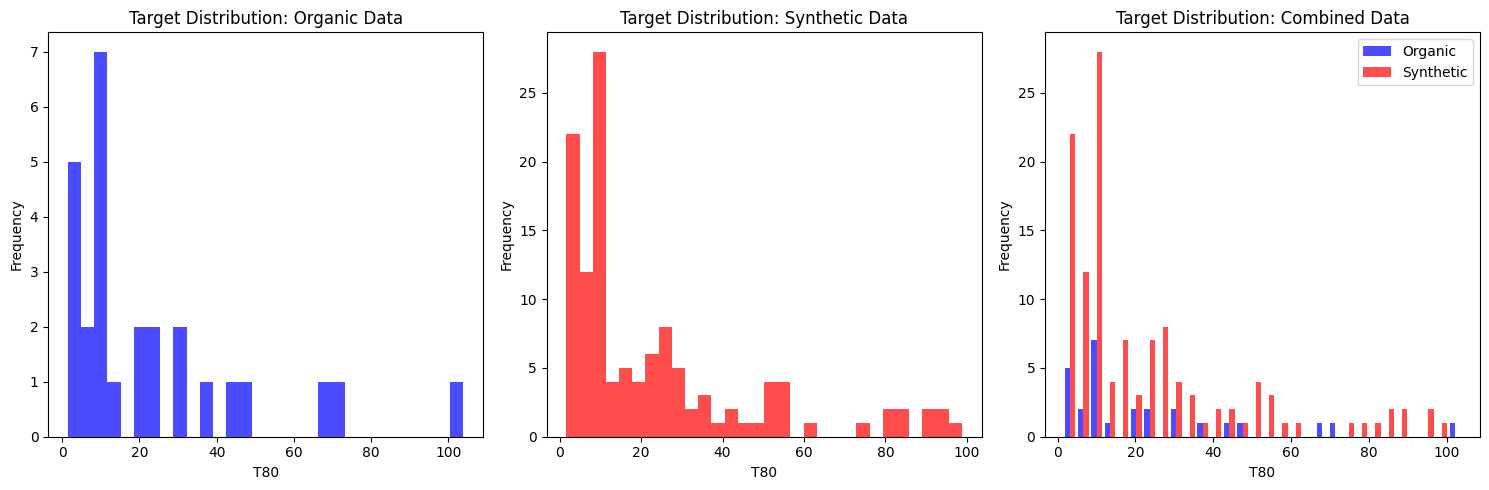

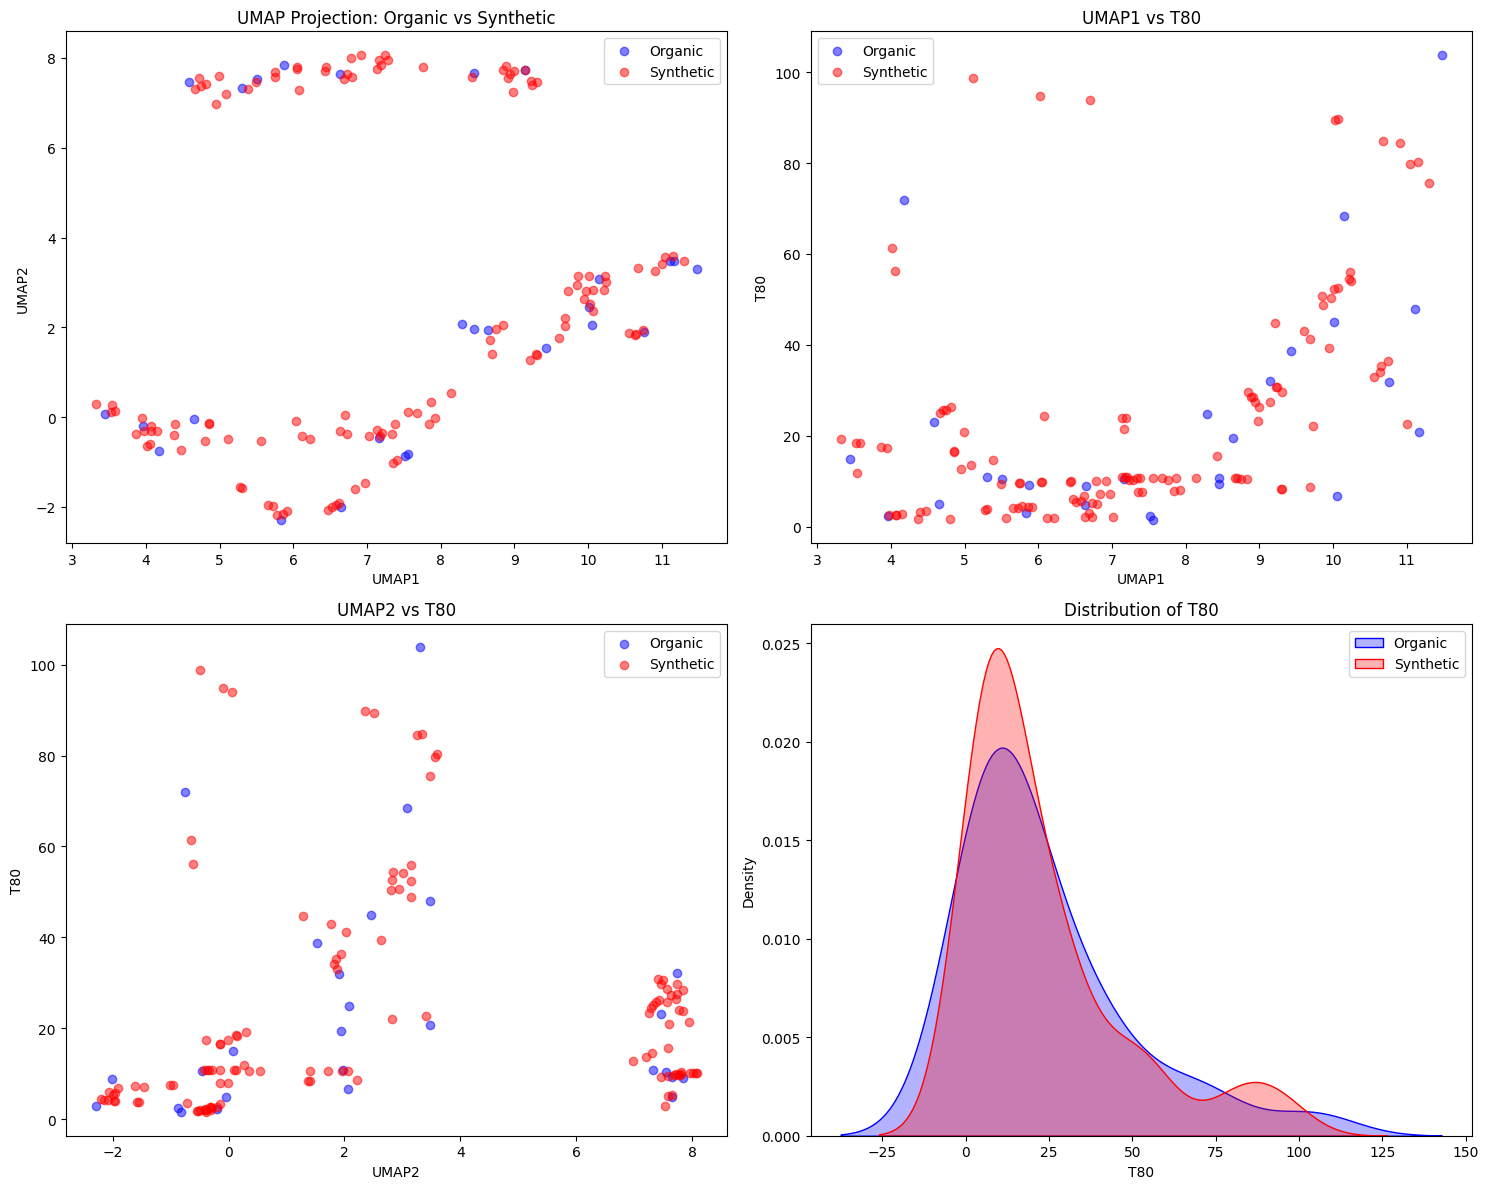

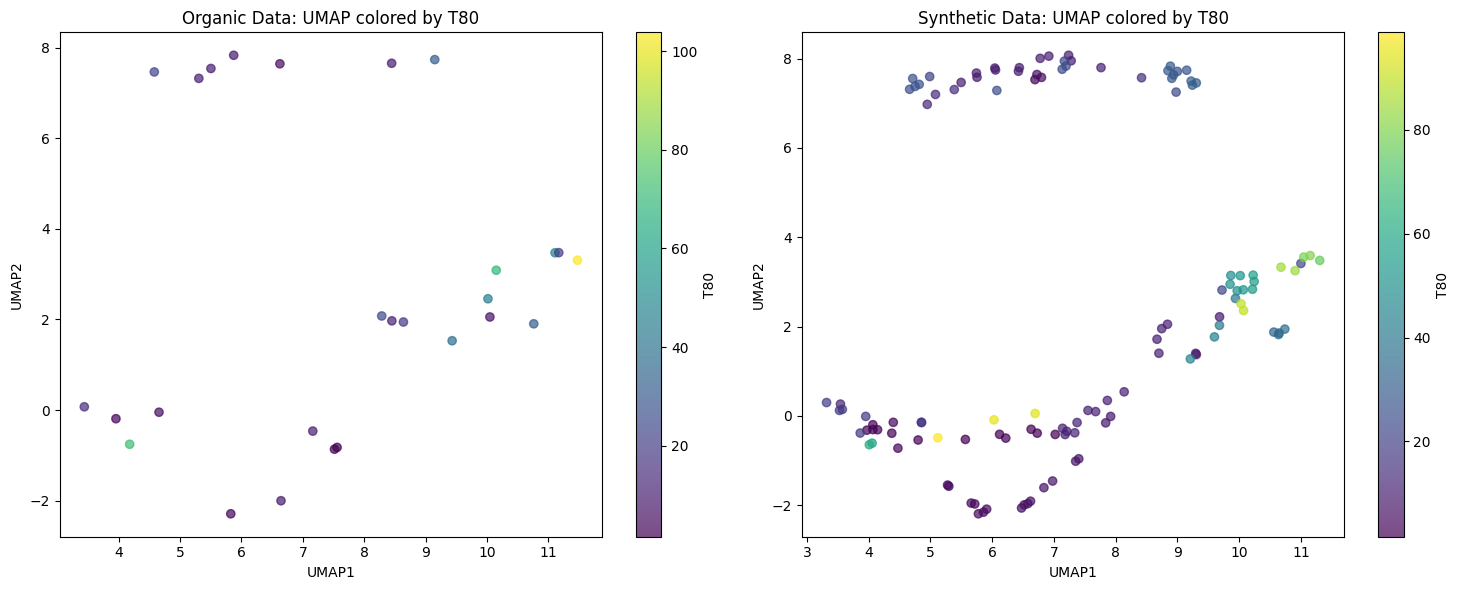


=== Target Distribution Bucket Analysis ===

Organic Data Distribution:
Bucket 1: 1.50 to 11.74: 14 samples
Bucket 2: 11.74 to 21.97: 3 samples
Bucket 3: 21.97 to 32.21: 4 samples
Bucket 4: 32.21 to 42.44: 1 samples
Bucket 5: 42.44 to 52.68: 2 samples
Bucket 6: 52.68 to 62.92: 0 samples
Bucket 7: 62.92 to 73.15: 2 samples
Bucket 8: 73.15 to 83.39: 0 samples
Bucket 9: 83.39 to 93.62: 0 samples
Bucket 10: 93.62 to 103.86: 1 samples

Synthetic Data Distribution:
Bucket 1: 1.50 to 11.74: 62 samples
Bucket 2: 11.74 to 21.97: 14 samples
Bucket 3: 21.97 to 32.21: 19 samples
Bucket 4: 32.21 to 42.44: 6 samples
Bucket 5: 42.44 to 52.68: 7 samples
Bucket 6: 52.68 to 62.92: 5 samples
Bucket 7: 62.92 to 73.15: 0 samples
Bucket 8: 73.15 to 83.39: 3 samples
Bucket 9: 83.39 to 93.62: 4 samples
Bucket 10: 93.62 to 103.86: 3 samples

Combined Data Distribution:
Bucket 1: 1.50 to 11.74: 76 samples
Bucket 2: 11.74 to 21.97: 17 samples
Bucket 3: 21.97 to 32.21: 23 samples
Bucket 4: 32.21 to 42.44: 7 samp

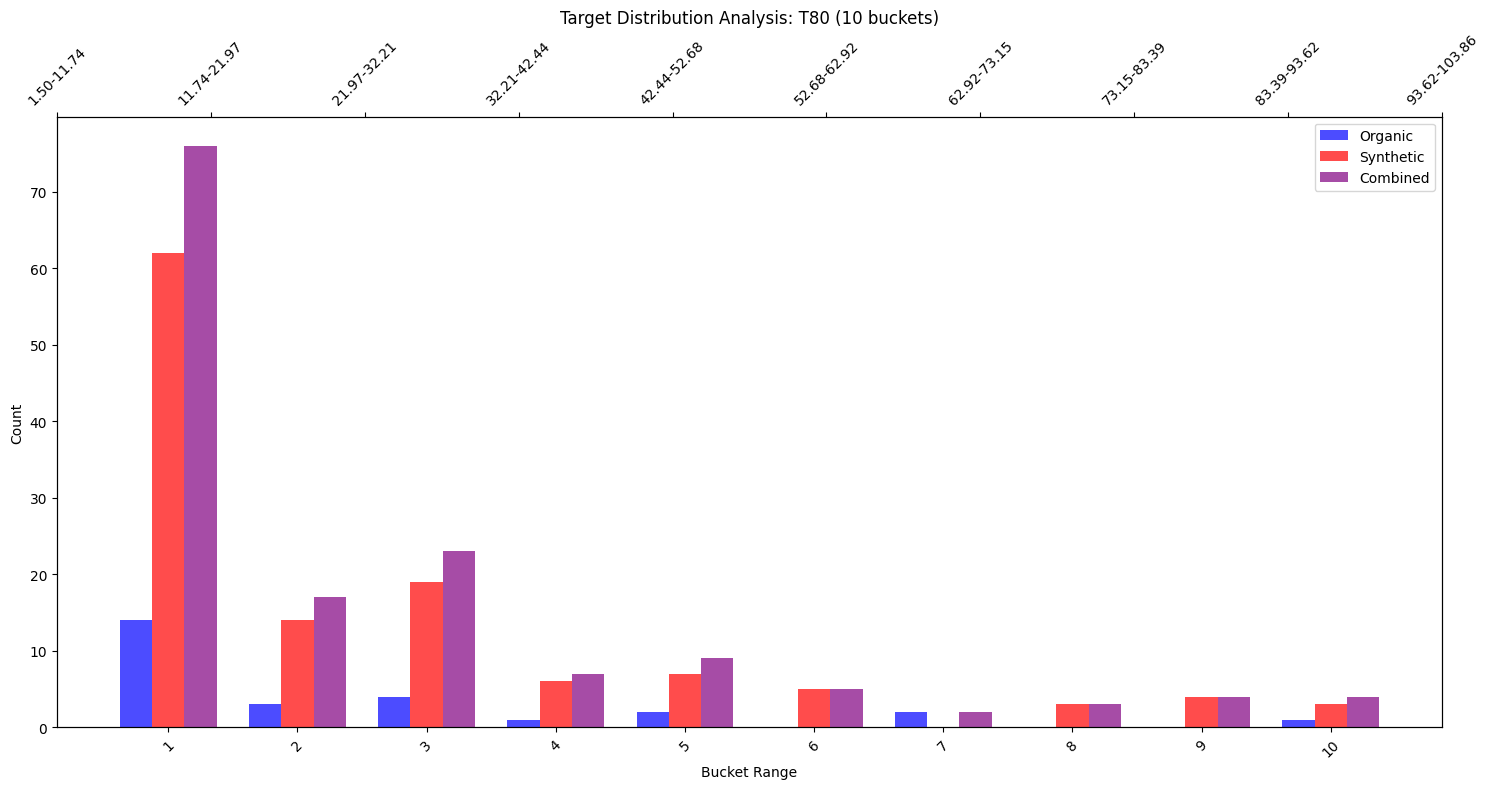

,Bucket,Organic,Synthetic,Combined
0,Bucket 1: 1.50 to 11.74,14,62,76
1,Bucket 2: 11.74 to 21.97,3,14,17
2,Bucket 3: 21.97 to 32.21,4,19,23
3,Bucket 4: 32.21 to 42.44,1,6,7
4,Bucket 5: 42.44 to 52.68,2,7,9
5,Bucket 6: 52.68 to 62.92,0,5,5
6,Bucket 7: 62.92 to 73.15,2,0,2
7,Bucket 8: 73.15 to 83.39,0,3,3
8,Bucket 9: 83.39 to 93.62,0,4,4
9,Bucket 10: 93.62 to 103.86,1,3,4


In [24]:
    base_path = "best_fold"  # or "stratified_sampling"
    target_column = target  # replace with your actual target column name
    
    # UMAP parameters
    n_components = 2  # Set to 2 for 2D plots only, 3 for 3D visualization
    n_neighbors = 15  # Lower for local structure, higher for global
    min_dist = 0.1    # Lower for tighter clusters
    n_buckets = 10
    
    analyze_augmentation_quality(base_path, target_column, n_components, n_neighbors, min_dist, n_buckets)